In [1]:
# importing pandas and numpy
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('D:\Water Quality Analysis and Prediction\water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Data Info 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
# Checking for Null Values
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
# Dropping Null Values
data= data.dropna()

In [6]:
data.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

## Not potable is much more potable(1200 > 811) so we need to balance the data to prevent bias

In [7]:
notpotable  = data[data['Potability']==0]
potable = data[data['Potability']==1]  

from sklearn.utils import resample
df_minority_upsampled = resample(potable, replace = True, n_samples = 1200) 

from sklearn.utils import shuffle
data = pd.concat([notpotable, df_minority_upsampled])
data = shuffle(data) 

In [8]:
# Data Shape
data.shape

(2400, 10)

In [9]:
data.Potability.value_counts()

0    1200
1    1200
Name: Potability, dtype: int64

# Exploratory Data Analysis (EDA)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Plot

<AxesSubplot:>

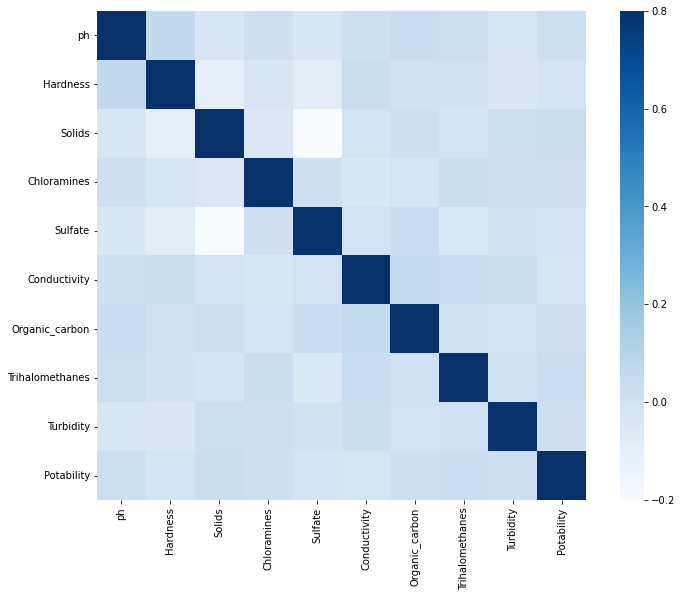

In [11]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="Blues")

<AxesSubplot:>

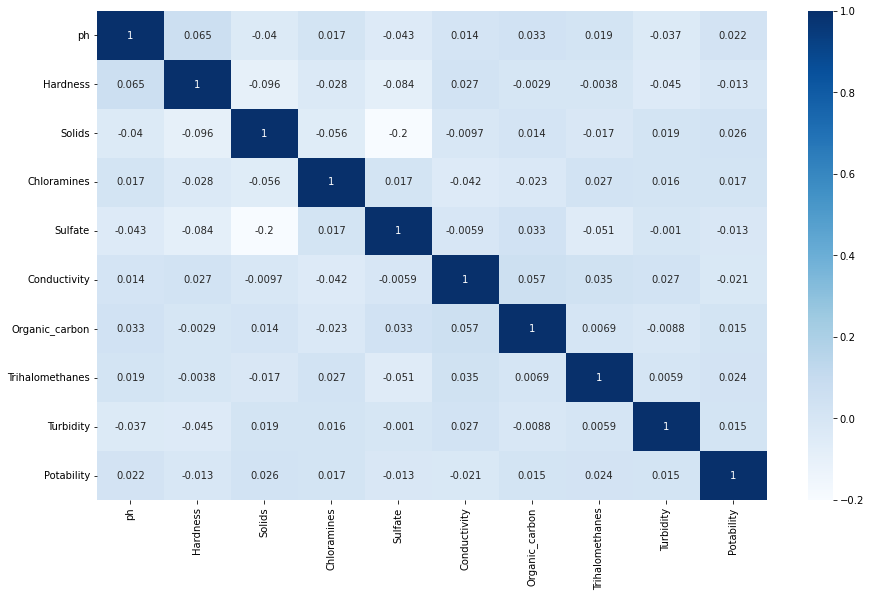

In [12]:
# Heatmap with Correlation
plt.figure(figsize = (15,9))
sns.heatmap(data.corr(), annot = True,cmap="Blues")

In [13]:
corr = data.corr()
corr["Potability"].sort_values(ascending=False)

Potability         1.000000
Solids             0.026120
Trihalomethanes    0.024033
ph                 0.021909
Chloramines        0.016610
Organic_carbon     0.015397
Turbidity          0.014979
Hardness          -0.012541
Sulfate           -0.013406
Conductivity      -0.020568
Name: Potability, dtype: float64

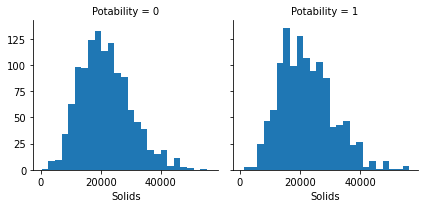

In [14]:
g = sns.FacetGrid(data, col='Potability')
g.map(plt.hist, 'Solids', bins=25)

# Applying Machine Learning Algorithm

In [24]:
#importing neccesary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score

In [16]:
x = data.drop(['Potability'], axis = 1)
y = data['Potability']

In [17]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
col= x.columns
x[col] = st.fit_transform(x[col])
x[col]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1422,0.730322,-0.406279,-0.430224,-0.257445,0.060765,1.775789,0.203895,-0.203213,-1.521894
2408,-0.888234,-0.655598,-0.872571,-1.093364,0.836451,0.564534,0.601822,-0.522534,1.456144
2335,-1.515599,-1.380355,-0.307134,0.488739,0.960180,-0.313550,-1.012014,0.158992,0.789334
2388,-0.900201,-1.509191,-0.080597,0.499749,1.209545,0.187389,0.680438,0.233299,-0.017351
1555,-0.043449,1.547369,-0.742700,0.265804,-0.640328,1.113583,0.938061,1.530459,-0.045099
...,...,...,...,...,...,...,...,...,...
2749,-0.769414,-0.339680,2.195159,-0.056483,-0.028035,1.695352,2.276976,-0.480699,-0.085583
1204,-0.729612,0.045724,0.079600,-0.896820,0.120661,-0.185923,-1.000749,-0.420099,-0.314512
1548,-0.305011,-0.093191,1.666046,-1.316505,-1.293844,-1.299522,0.102345,0.878403,-0.788728
1380,-0.252862,0.244048,0.218861,-0.248514,0.215582,0.370837,0.435720,-0.183739,-0.133009


In [18]:
# Train test splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.1)

In [20]:
# ML models
dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

In [21]:
# decision Tree
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)


In [22]:
grid_dt.fit(X_train, Y_train)
grid_rf.fit(X_train, Y_train)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 48, 'min_samples_leaf': 1}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 200}


In [25]:
# accuracy of the model
models = [('Decision Tree', dt), ('Random Forest', rf)]


for model_name, model in models:
 
    model.fit(X_train, Y_train)    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    print('{:s} : {:.2f}'.format(model_name, accuracy))

Decision Tree : 0.82
Random Forest : 0.89
